<a href="https://colab.research.google.com/github/sripriyaagarwal16/Model-Comparison-Sarcasm-Detection/blob/main/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCTION

Fuzzy-Rough Nearest Neighbor Classification for Sarcasm Detection

Sarcasm detection is a challenging task in natural language processing (NLP) and sentiment analysis. Sarcasm often involves a subtle interplay of words and context that can be difficult to capture using traditional machine learning methods. In recent years, researchers have explored various techniques to improve the accuracy of sarcasm detection, and one promising approach is the use of Fuzzy-Rough Nearest Neighbor Classification (FRNN).

PROBLEM STATEMENT
Comparative Analysis of various models for Sarcasm detection using Natural Language Processing

In [ ]:
from google.colab import files
uploaded = files.upload();

Saving Sarcasm_Kaggle_1.csv to Sarcasm_Kaggle_1.csv


In [ ]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
#getting the idea about dataset
train_data = pd.read_csv('Sarcasm_Kaggle_1.csv')
train_data.head()

,Tweet,Label
0,I love finding out who your true friends are. ...,0
1,USER :/ bye,0
2,USER I absolutely love Kanye's voice USER,0
3,We're hiring a new Kiosk Supervisor! Think you...,0
4,Every time I see Dave Grohl with his long hipp...,0


In [ ]:
#shape of dataset
train_data.shape

(4553, 2)

In [ ]:
train_data.isnull().sum()

Tweet    0
Label    0
dtype: int64

<Axes: >

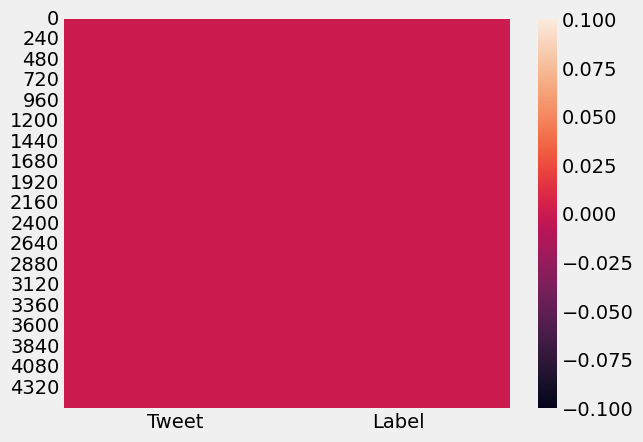

In [ ]:
sns.heatmap(train_data.isnull())

ABOVE HEATMAP SHOW THAT THERE ARE NO MISSING VALUES IN THE DATASET


In [ ]:
#checking how many labels are present in the dataset
train_data['Label'].unique()

array([0, 1])

sarcastic= 1000
not sarcastic= 3553


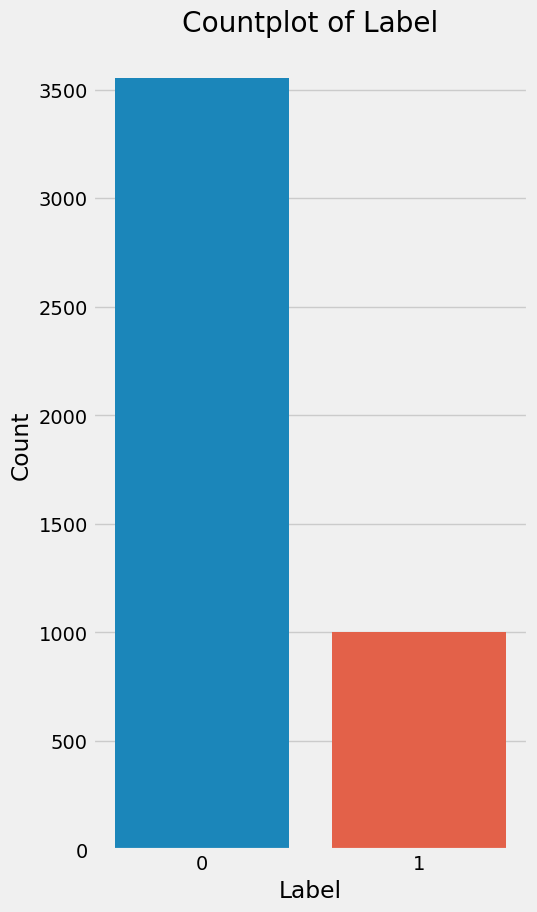

In [ ]:
print("sarcastic=",len(train_data[train_data['Label']==1]))
print("not sarcastic=",len(train_data[train_data['Label']==0]))
#plotting a countplot
column_name = 'Label'
plt.figure(figsize=(5, 10))

sns.countplot(data=train_data, x=column_name)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Count')
plt.title(f'Countplot of {column_name}')

# Show the plot
plt.show()

Handling the imbalance in the data:

our dataset is imbalanced, where one class(label=0) has significantly more samples than the others, the classifier can be biased towards the majority class.

The Random Over-Sampling technique focuses on the minority class (the class with fewer samples) and aims to balance the class distribution by randomly duplicating instances from the minority class until its size matches the size of the majority class.

Random Over-Sampling process works:

Identify the minority class that you want to balance.

Randomly select instances from the minority class with replacement (allowing the same instance to be selected multiple times), adding these instances to the dataset.

Repeat step 2 until the size of the minority class reaches the desired level of balance or matches the size of the majority class.

Use the balanced dataset for training your machine learning model.

In [ ]:
#Extracting independent (x) and dependent (y) features from our dataset
x=train_data.drop(["Label"], axis=1)
y=train_data.Label

In [ ]:
# Define and oversample x and y
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)

print(f"Before sampling:- {Counter(y)}")
print(f"After sampling:- {Counter(y_ros)}")

Before sampling:- Counter({0: 3553, 1: 1000})
After sampling:- Counter({0: 3553, 1: 3553})


<Axes: title={'center': 'After applying RandomOverSampler'}>

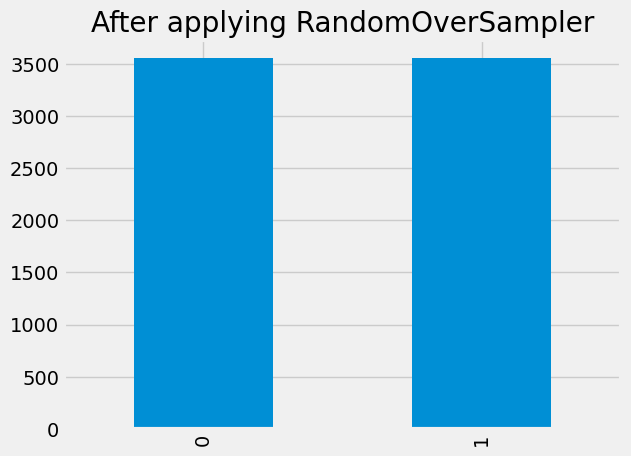

In [ ]:
# Visualizing
y_ros.value_counts().plot(kind='bar', title='After applying RandomOverSampler')

MODEL SELECTION

1) RANDOM FOREST

2) LSTM

3) MULTINOMIAL NAIVE BIAS

4) XGBOOST CLASSIFIER



RANDOM FOREST

FEATURE EXTRACTION

In this code, the TfidfVectorizer is used to convert the text data in X_train and X_test into TF-IDF (Term Frequency-Inverse Document Frequency) feature vectors. This vectorization technique transforms the text data into numerical features that can be used as input for machine learning algorithms. It calculates the importance of each word in the document relative to the entire corpus, effectively encoding the textual information in a numerical format.







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

data = pd.read_csv('Sarcasm_Kaggle_1.csv')

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Tweet'], data['Label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Confusion Matrix:
[[709   9]
 [ 54 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       718
           1       0.94      0.72      0.82       193

    accuracy                           0.93       911
   macro avg       0.93      0.85      0.89       911
weighted avg       0.93      0.93      0.93       911



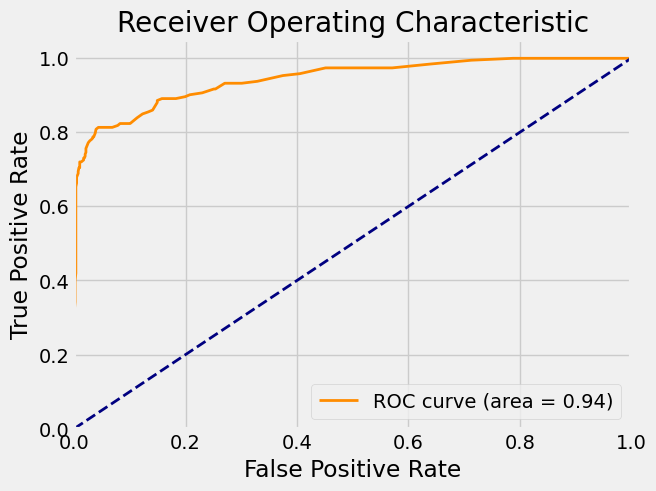

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_model.predict(X_test_tfidf)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# ROC curve
y_scores = rf_model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

2. LSTM MODEL

FEATURE EXTRACTION

Tokenization and Padding:

Tokenization is performed using the Tokenizer class from TensorFlow Keras. It converts the text data into sequences of integers, where each word is represented by a unique integer.
TensorFlow Keras is an open-source high-level neural networks API that serves as a user-friendly interface for designing, building, training, and deploying artificial neural networks and deep learning models. It is a critical component of TensorFlow, one of the most popular deep learning frameworks.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load your dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

X = data['Tweet']
y = data['Label']

# Tokenize and pad sequences
max_words = 10000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

Epoch 1/10
46/46 [==============================] - 17s 248ms/step - loss: 0.5391 - accuracy: 0.7628 - val_loss: 0.4308 - val_accuracy: 0.8052
Epoch 2/10
46/46 [==============================] - 10s 207ms/step - loss: 0.2625 - accuracy: 0.8915 - val_loss: 0.2295 - val_accuracy: 0.9232
Epoch 3/10
46/46 [==============================] - 11s 240ms/step - loss: 0.1154 - accuracy: 0.9629 - val_loss: 0.2603 - val_accuracy: 0.9067
Epoch 4/10
46/46 [==============================] - 12s 254ms/step - loss: 0.0624 - accuracy: 0.9801 - val_loss: 0.2790 - val_accuracy: 0.9177
Epoch 5/10
46/46 [==============================] - 13s 292ms/step - loss: 0.0342 - accuracy: 0.9924 - val_loss: 0.2767 - val_accuracy: 0.9218
Epoch 6/10
46/46 [==============================] - 11s 243ms/step - loss: 0.0243 - accuracy: 0.9945 - val_loss: 0.3219 - val_accuracy: 0.9191
Epoch 7/10
46/46 [==============================] - 12s 254ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.3652 - val_accuracy: 0.9150

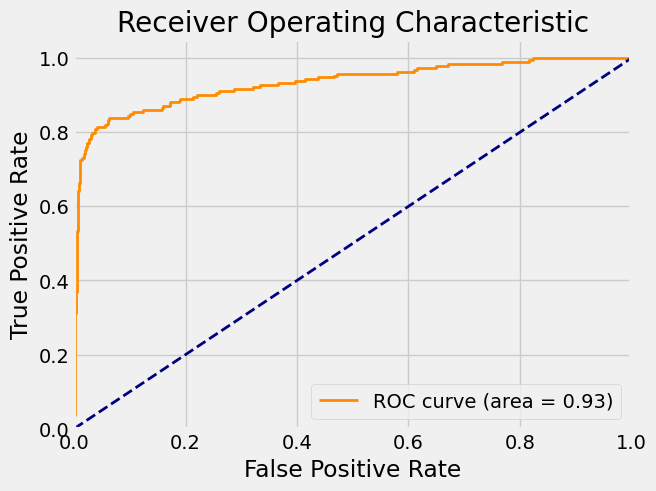

Precision (Sarcastic): 0.8603351955307262
Recall (Sarcastic): 0.7979274611398963
F1 Score (Sarcastic): 0.8279569892473119
ROC AUC: 0.9339414320146637


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=100, activation='tanh', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Other performance metrics
precision = classification_report(y_test, y_pred, target_names=['Non-Sarcastic', 'Sarcastic'], output_dict=True)['Sarcastic']['precision']
recall = classification_report(y_test, y_pred, target_names=['Non-Sarcastic', 'Sarcastic'], output_dict=True)['Sarcastic']['recall']
f1 = classification_report(y_test, y_pred, target_names=['Non-Sarcastic', 'Sarcastic'], output_dict=True)['Sarcastic']['f1-score']

print("Precision (Sarcastic):", precision)
print("Recall (Sarcastic):", recall)
print("F1 Score (Sarcastic):", f1)
print("ROC AUC:", roc_auc)

3. MULTINOMIAL NAIVE BIAS

4. XGBOOST CLASSIFIER

Accuracy: 0.93
Confusion Matrix:
[[697  21]
 [ 46 147]]
Classification Report:
               precision    recall  f1-score   support

Non-Sarcastic       0.94      0.97      0.95       718
    Sarcastic       0.88      0.76      0.81       193

     accuracy                           0.93       911
    macro avg       0.91      0.87      0.88       911
 weighted avg       0.92      0.93      0.92       911



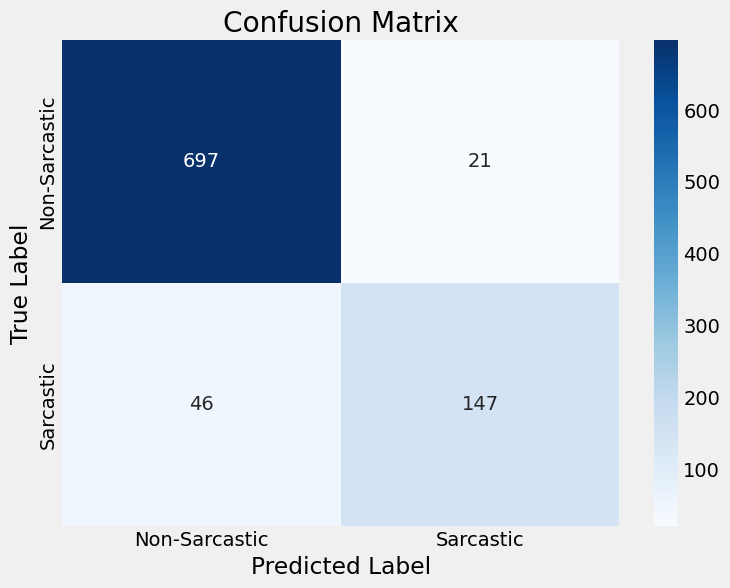

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

tweets = data["Tweet"].tolist()
labels = data["Label"].tolist()

# Split data into train and test sets
train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_tweets)
X_test = vectorizer.transform(test_tweets)

# Train XGBoost classifier
classifier = xgb.XGBClassifier()
classifier.fit(X_train, train_labels)

# Predictions
y_pred = classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
conf_matrix = confusion_matrix(test_labels, y_pred)
class_report = classification_report(test_labels, y_pred, target_names=["Non-Sarcastic", "Sarcastic"])

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Sarcastic", "Sarcastic"],
            yticklabels=["Non-Sarcastic", "Sarcastic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


ENSEMBLE LEARNING